In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data = boston.data
label = boston.target
columns = boston.feature_names

In [5]:
data = pd.DataFrame(data,columns = columns)
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [6]:
data.shape

(506, 13)

In [7]:
# Simple Linear Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state=2022)

In [8]:
# -1, 1의 비밀을 이해해야 함
X_train['RM'].values.reshape(-1,1)[:5] # <-- 데이터의 차원을 바꿔주는 reshape

array([[7.454],
       [6.315],
       [6.382],
       [5.942],
       [8.247]])

In [9]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [10]:
sim_lr.fit(X_train['RM'].values.reshape((-1,1)), y_train)

LinearRegression()

In [11]:
y_pred = sim_lr.predict(X_test['RM'].values.reshape((-1,1)))

In [12]:
# 결과 살펴보기
from sklearn.metrics import r2_score
print('단순 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred))) # :4f <-- 소수점 4자리까지 표시

단순 선형 회귀, R2: 0.2121


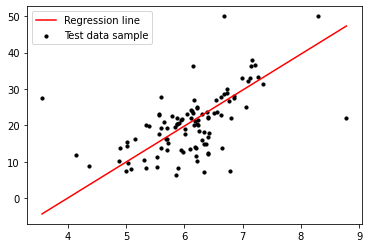

In [13]:
# 결과 시각화 하기

line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 10) # (시작값, 끝값, 그 사이에 찍을 점 개수)
line_y = sim_lr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, s=10, c = 'black')
plt.plot(line_x, line_y, c = 'red')
plt.legend(['Regression line', 'Test data sample'], loc = 'upper left')

In [30]:
line_x

array([3.561     , 3.61371717, 3.66643434, 3.71915152, 3.77186869,
       3.82458586, 3.87730303, 3.9300202 , 3.98273737, 4.03545455,
       4.08817172, 4.14088889, 4.19360606, 4.24632323, 4.2990404 ,
       4.35175758, 4.40447475, 4.45719192, 4.50990909, 4.56262626,
       4.61534343, 4.66806061, 4.72077778, 4.77349495, 4.82621212,
       4.87892929, 4.93164646, 4.98436364, 5.03708081, 5.08979798,
       5.14251515, 5.19523232, 5.24794949, 5.30066667, 5.35338384,
       5.40610101, 5.45881818, 5.51153535, 5.56425253, 5.6169697 ,
       5.66968687, 5.72240404, 5.77512121, 5.82783838, 5.88055556,
       5.93327273, 5.9859899 , 6.03870707, 6.09142424, 6.14414141,
       6.19685859, 6.24957576, 6.30229293, 6.3550101 , 6.40772727,
       6.46044444, 6.51316162, 6.56587879, 6.61859596, 6.67131313,
       6.7240303 , 6.77674747, 6.82946465, 6.88218182, 6.93489899,
       6.98761616, 7.04033333, 7.09305051, 7.14576768, 7.19848485,
       7.25120202, 7.30391919, 7.35663636, 7.40935354, 7.46207

In [14]:
# Multiple Linear Regression
mul_lr = LinearRegression()
mul_lr.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = mul_lr.predict(X_test)

In [16]:
print('다중 선형 회귀 R2: {:4f}'.format(r2_score(y_test, y_pred)))

다중 선형 회귀 R2: 0.622569


In [17]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth = 5)

In [18]:
dt_regr.fit(X_train['RM'].values.reshape((-1,1)),y_train)

DecisionTreeRegressor(max_depth=5)

In [19]:
y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))

In [20]:
print('단순 결정 트리 회귀 R2: {:4f}'.format(r2_score(y_test,y_pred)))

단순 결정 트리 회귀 R2: 0.324723


In [21]:
arr = np.arange(1,11)

In [22]:
best_depth = 0
best_r2 = 0

for depth in arr:
  dt_regr = DecisionTreeRegressor(max_depth = depth)
  dt_regr.fit(X_train['RM'].values.reshape((-1,1)),y_train)
  y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))

  temp_r2 = r2_score(y_test,y_pred)
  print('\n단순 결정 트리 회귀 depth = {} R2: {:4f}'.format(depth,temp_r2))

  if best_r2 < temp_r2:
    best_depth = depth
    best_r2 = temp_r2

print('최적의 결과는 depth ={} r2 = {:.4f}' .format(best_depth, best_r2))


단순 결정 트리 회귀 depth = 1 R2: 0.245946

단순 결정 트리 회귀 depth = 2 R2: 0.354749

단순 결정 트리 회귀 depth = 3 R2: 0.393140

단순 결정 트리 회귀 depth = 4 R2: 0.381640

단순 결정 트리 회귀 depth = 5 R2: 0.324723

단순 결정 트리 회귀 depth = 6 R2: 0.347434

단순 결정 트리 회귀 depth = 7 R2: 0.316384

단순 결정 트리 회귀 depth = 8 R2: 0.336849

단순 결정 트리 회귀 depth = 9 R2: 0.309834

단순 결정 트리 회귀 depth = 10 R2: 0.257860
최적의 결과는 depth =3 r2 = 0.3931


In [23]:
dt_regr = DecisionTreeRegressor(max_depth = 8)
dt_regr.fit(X_train, y_train)

y_pred = dt_regr.predict(X_test)
print('다중 결정 트리  R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 결정 트리  R2: 0.7406


In [24]:
# Support Vector machine Regressor 
from sklearn.svm import SVR
svm_regr = SVR(C=2)

svm_regr.fit(X_train['RM'].values.reshape(-1,1), y_train)
y_pred = svm_regr.predict(X_test['RM'].values.reshape(-1,1))

print('단순 서포트 벡터 머신 회귀 R2: {:.4f}'.format(r2_score(y_test,y_pred)))

단순 서포트 벡터 머신 회귀 R2: 0.4202


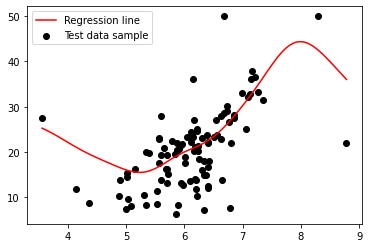

In [25]:
# 결과의 시각화
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 100)
line_y = svm_regr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, c = 'black')
plt.plot(line_x, line_y, c = 'red')
plt.legend(['Regression line', 'Test data sample'], loc = 'upper left')

In [26]:
svm_regr = SVR(C = 20)

svm_regr.fit(X_train, y_train)
y_pred = svm_regr.predict(X_test)
print('다중 서포트 벡터 머신 회귀 R2: {:.4f}'.format(r2_score(y_test,y_pred)))

# 반복문 넣어서 가장 좋은 C값 찾기

다중 서포트 벡터 머신 회귀 R2: 0.4234


In [31]:
arr = np.arange(1,507)

In [33]:
best_c = 0
best_r2 = 0

for c in arr:
  svm_regr = SVR(C = c)
  svm_regr.fit(X_train, y_train)
  y_pred = svm_regr.predict(X_test)
  temp_r2 = r2_score(y_test, y_pred)

  if best_r2 < temp_r2 :
    best_c = c
    best_r2 = temp_r2
print('최적의 결과는 c ={} r2 = {:.4f}' .format(best_c, best_r2))

최적의 결과는 c =472 r2 = 0.6446
